In [1]:
import cv2                                # state of the art computer vision algorithms library
import numpy as np                        # fundamental package for scientific computing
import matplotlib.pyplot as plt           # 2D plotting library producing publication quality figures
import pyrealsense2 as rs                 # Intel RealSense cross-platform open-source API
from IPython.display import clear_output 
print("Environment Ready")

Environment Ready


In [ ]:
pipe = rs.pipeline()
profile = pipe.start()
try:
  for i in range(0, 1000):
    frames = pipe.wait_for_frames()
    color_frame = frames.get_color_frame() 

    image=np.asanyarray(color_frame.get_data())
    image= cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

    cv2.namedWindow('Example', cv2.WINDOW_AUTOSIZE)
    cv2.imshow('Example', image)
    key = cv2.waitKey(1)
    # Press esc or 'q' to close the image window
    if key & 0xFF == ord('q') or key == 27:
        cv2.destroyAllWindows()
        break

finally:
    pipe.stop()
    cv2.destroyAllWindows()

In [3]:
image.shape

(480, 640, 3)

In [2]:
pipe = rs.pipeline()                      # Create a pipeline
cfg = rs.config()                         # Create a default configuration
print("Pipeline is created")

Pipeline is created


In [3]:
print("Searching Devices..")
selected_devices = []                     # Store connected device(s)

for d in rs.context().devices:
    selected_devices.append(d)
    print(d.get_info(rs.camera_info.name))
if not selected_devices:
    print("No RealSense device is connected!")

Searching Devices..
Intel RealSense D435I


In [4]:
rgb_sensor = depth_sensor = None

for device in selected_devices:                         
    print("Required sensors for device:", device.get_info(rs.camera_info.name))
    for s in device.sensors:                              # Show available sensors in each device
        if s.get_info(rs.camera_info.name) == 'RGB Camera':
            print(" - RGB sensor found")
            rgb_sensor = s                                # Set RGB sensor
        if s.get_info(rs.camera_info.name) == 'Stereo Module':
            depth_sensor = s                              # Set Depth sensor
            print(" - Depth sensor found")

Required sensors for device: Intel RealSense D435I
 - Depth sensor found
 - RGB sensor found


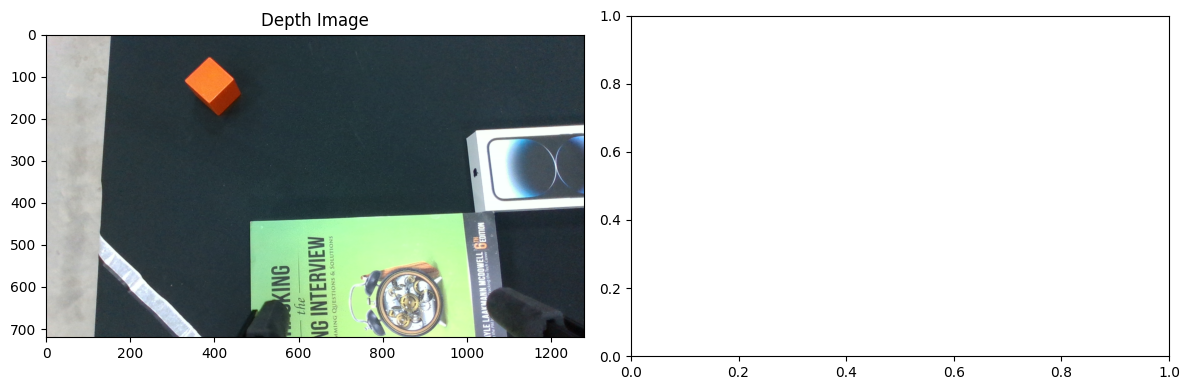

Done!


In [5]:
colorizer = rs.colorizer()                                # Mapping depth data into RGB color space
profile = pipe.start(cfg)                                 # Configure and start the pipeline

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,4)) # Show 1 row with 2 columns for Depth and RGB frames
title = ["Depth Image", "RGB Image"]                      # Title for each frame

for _ in range(10):                                       # Skip first frames to give syncer and auto-exposure time to adjust
    frameset = pipe.wait_for_frames()
    
for _ in range(5):                                        # Increase to display more frames
    frameset = pipe.wait_for_frames()                     # Read frames from the file, packaged as a frameset
    color_frame = frameset.get_color_frame()              # Get RGB frame

    colorized_streams = []                                # This is what we'll actually display
    if color_frame:
        colorized_streams.append(np.asanyarray(color_frame.get_data()))
    
    for i, ax in enumerate(axs.flatten()):                # Iterate over all (Depth and RGB) colorized frames
        if i >= len(colorized_streams): continue          # When getting less frames than expected
        plt.sca(ax)                                       # Set the current Axes and Figure
        plt.imshow(colorized_streams[i])                  # colorized frame to display
        plt.title(title[i])                               # Add title for each subplot
    clear_output(wait=True)                               # Clear any previous frames from the display
    plt.tight_layout()                                    # Adjusts display size to fit frames
    plt.pause(1)                                          # Make the playback slower so it's noticeable
    
pipe.stop()                                               # Stop the pipeline
print("Done!")